我在 Tensorflow 官網的教學網頁上找到了用 Iris 當例題的 estimator tutorial https://www.tensorflow.org/versions/master/get_started/premade_estimators (also on my Ynote "Get Started with Estimators _TensorFlow_") 有正式、詳細的介紹。
這篇文章鼓勵人用 Estimator API 跟 Dataset API。本文研讀、實驗這篇文章。
文章引用的 GitHub resource 我已經 clone 下來了在 T550 `c:\Users\hcche\Documents\GitHub\models`  

重點是，直接用 pandas data-frame 來當作 feature - label 餵給 input function 這樣更自然，免去搞 150 天行情資料的麻煩。


In [43]:
import tensorflow as tf

In [44]:
tf.__version__

'1.8.0'

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [5]:
import peforth
peforth.dictate(r'''
\ Now we redefine the 'unknown' command that was do-nothing by default
: unknown ( token -- thing Y|N) // Try to find the unknown token in __main__
  py> getattr(sys.modules['__main__'],pop(),"Ûnknôwn") 
  py> str(tos())=="Ûnknôwn" if drop false else true then ;
  /// here after, when FORTH come accross an unknown token, instead of alerting 
  /// it try to find the token in python __main__ module name space.

\ Redefine \ command to print the comment line
code \ print(nexttoken('\n')) end-code ''');

reDef \


In [8]:
iris = datasets.load_iris()

In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
iris.data[:4]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2]])

In [41]:
# df = pd.DataFrame(np.array(irisX).reshape(-1,4), columns = iris.feature_names)    
x = pd.DataFrame(iris.data, columns = iris.feature_names)    
x[:4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [48]:
y = pd.DataFrame(iris.target, columns = ["target"])    
y[48:52]

,target
48,0
49,0
50,1
51,1


In [50]:
# https://www.tensorflow.org/api_docs/python/tf/estimator/inputs/pandas_input_fn

tf.estimator.inputs.pandas_input_fn(
    x,
    y,
    batch_size=64,
    num_epochs=5,
    shuffle=False,
    queue_capacity=None,
    num_threads=1,
    target_column='target'
)

<function tensorflow.python.estimator.inputs.pandas_io.pandas_input_fn.<locals>.input_fn>

# 照 Tutorial 執行 -- 一把就成功！

直接把本 notebook 建個 hard link 到 c:\Users\hcche\Documents\GitHub\models\samples\core\get_started 去執行...


In [1]:
%run premade_estimator.py

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\hcche\\AppData\\Local\\Temp\\tmpu7v06ooe', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E06D39E518>, '_task_type': 'worker', 

## 開始照教材研讀
    
premade_estimator.py iris_data.py 都抓過來如下：

In [9]:
#  Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#   http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
"""An Example of a DNNClassifier for the Iris dataset."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import tensorflow as tf

import iris_data

'An Example of a DNNClassifier for the Iris dataset.'

這 argparse module 很常見 DeepSpeech 就有，這裡用不著吧！

In [10]:
parser = argparse.ArgumentParser()
parser.add_argument('--batch_size', default=100, type=int, help='batch size')
parser.add_argument('--train_steps', default=1000, type=int,
                    help='number of training steps')

_StoreAction(option_strings=['--batch_size'], dest='batch_size', nargs=None, const=None, default=100, type=<class 'int'>, choices=None, help='batch size', metavar=None)

_StoreAction(option_strings=['--train_steps'], dest='train_steps', nargs=None, const=None, default=1000, type=<class 'int'>, choices=None, help='number of training steps', metavar=None)

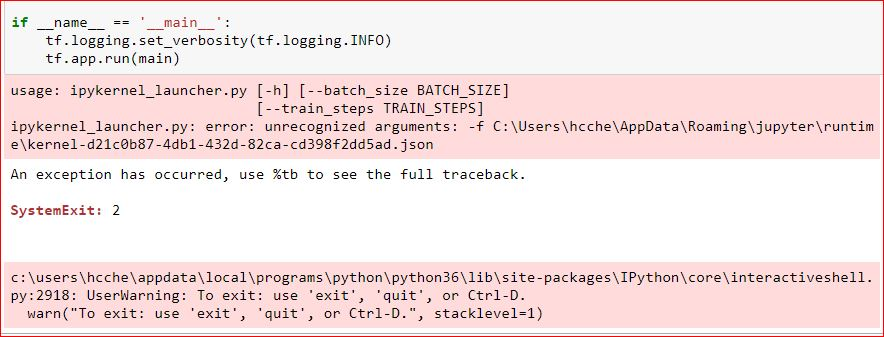

In [19]:
# 不能在 jupyter notebook 下直接跑，因為 argv 不如預期。
from IPython.display import display,Image;display(Image('error1.jpg', width=700))

In [20]:
def main(argv):
    args = parser.parse_args("")  # argv[1:])
    peforth.push(args).ok(cmd='constant Args')
    # Fetch the data
    (train_x, train_y), (test_x, test_y) = iris_data.load_data()

    # Feature columns describe how to use the input.
    my_feature_columns = []
    for key in train_x.keys():
        my_feature_columns.append(tf.feature_column.numeric_column(key=key))

    # Build 2 hidden layer DNN with 10, 10 units respectively.
    classifier = tf.estimator.DNNClassifier(
        feature_columns=my_feature_columns,
        # Two hidden layers of 10 nodes each.
        hidden_units=[10, 10],
        # The model must choose between 3 classes.
        n_classes=3)

    # Train the Model.
    classifier.train(
        input_fn=lambda:iris_data.train_input_fn(train_x, train_y,
                                                 args.batch_size),
        steps=args.train_steps)

    # Evaluate the model.
    eval_result = classifier.evaluate(
        input_fn=lambda:iris_data.eval_input_fn(test_x, test_y,
                                                args.batch_size))

    print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

    # Generate predictions from the model
    expected = ['Setosa', 'Versicolor', 'Virginica']
    predict_x = {
        'SepalLength': [5.1, 5.9, 6.9],
        'SepalWidth': [3.3, 3.0, 3.1],
        'PetalLength': [1.7, 4.2, 5.4],
        'PetalWidth': [0.5, 1.5, 2.1],
    }

    predictions = classifier.predict(
        input_fn=lambda:iris_data.eval_input_fn(predict_x,
                                                labels=None,
                                                batch_size=args.batch_size))

    template = ('\nPrediction is "{}" ({:.1f}%), expected "{}"')

    for pred_dict, expec in zip(predictions, expected):
        class_id = pred_dict['class_ids'][0]
        probability = pred_dict['probabilities'][class_id]

        print(template.format(iris_data.SPECIES[class_id],
                              100 * probability, expec))


if __name__ == '__main__':
    tf.logging.set_verbosity(tf.logging.INFO)
    tf.app.run(main)

OK exit
OK INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\hcche\\AppData\\Local\\Temp\\tmp2g4qop_v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E06EE4A780>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\User

SystemExit: 

c:\users\hcche\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import pandas as pd
import tensorflow as tf

TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth',
                    'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

def maybe_download():
    train_path = tf.keras.utils.get_file(TRAIN_URL.split('/')[-1], TRAIN_URL)
    test_path = tf.keras.utils.get_file(TEST_URL.split('/')[-1], TEST_URL)

    return train_path, test_path

def load_data(y_name='Species'):
    """Returns the iris dataset as (train_x, train_y), (test_x, test_y)."""
    train_path, test_path = maybe_download()

    train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
    train_x, train_y = train, train.pop(y_name)

    test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
    test_x, test_y = test, test.pop(y_name)

    return (train_x, train_y), (test_x, test_y)


def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    dataset = dataset.shuffle(1000).repeat().batch(batch_size)

    # Return the dataset.
    return dataset


def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset


# The remainder of this file contains a simple example of a csv parser,
#     implemented using the `Dataset` class.

# `tf.parse_csv` sets the types of the outputs to match the examples given in
#     the `record_defaults` argument.
CSV_TYPES = [[0.0], [0.0], [0.0], [0.0], [0]]

def _parse_line(line):
    # Decode the line into its fields
    fields = tf.decode_csv(line, record_defaults=CSV_TYPES)

    # Pack the result into a dictionary
    features = dict(zip(CSV_COLUMN_NAMES, fields))

    # Separate the label from the features
    label = features.pop('Species')

    return features, label


def csv_input_fn(csv_path, batch_size):
    # Create a dataset containing the text lines.
    dataset = tf.data.TextLineDataset(csv_path).skip(1)

    # Parse each line.
    dataset = dataset.map(_parse_line)

    # Shuffle, repeat, and batch the examples.
    dataset = dataset.shuffle(1000).repeat().batch(batch_size)

    # Return the dataset.
    return dataset


    ----- play ground -----

In [5]:
# This cell creates %%csv cell magic. See http://ipython-books.github.io/14-creating-an-ipython-extension-with-custom-magic-commands
import pandas as pd
from io import StringIO
from IPython.core.magic import (register_cell_magic)
@register_cell_magic
def csv(line, cell):
    return pd.read_csv(StringIO(cell), sep=line, engine='python')

In [6]:
%%csv \s+
a b c
1 2 3
4 5 6
7 8 9

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9
